In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns

In [29]:
df = pd.read_csv("C:/Users/marve/Vidhyuth/Programming/Datasets/Jordan Weather/weather_data_24hr.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             14049 non-null  int64  
 1   date               14049 non-null  object 
 2   maxtempC           14049 non-null  int64  
 3   maxtempF           14049 non-null  int64  
 4   mintempC           14049 non-null  int64  
 5   mintempF           14049 non-null  int64  
 6   avgtempC           14049 non-null  int64  
 7   avgtempF           14049 non-null  int64  
 8   totalprecipMM      14049 non-null  float64
 9   totalprecipIn      14049 non-null  float64
 10  windspeedMiles     14049 non-null  int64  
 11  windspeedKmph      14049 non-null  int64  
 12  sunhour            14049 non-null  float64
 13  winddirdegree      14049 non-null  int64  
 14  winddir16point     14049 non-null  object 
 15  weatherCode        14049 non-null  int64  
 16  weatherIconUrl     140

In [31]:
#Remove any repatative representation of data in fahrenheit vs. celsius and Miles vs. Km
df= df.drop(['maxtempF', 'mintempF', 'avgtempF', 'totalprecipIn',
             'weatherCode', 'weatherIconUrl', 'visibilityMiles', 
             'HeatIndexF', 'DewPointF','WindChillF', 'WindGustMiles',
             'FeelsLikeF','windspeedMiles','weatherDesc','moon_phase','winddir16point'],axis=1)

In [32]:
df['sunrise'] = pd.to_datetime(df['sunrise'],format='%H:%M %p')
df['sunset'] = pd.to_datetime(df['sunset'],format='%H:%M %p')
df.drop(df[df['moonrise'] == 'No moonrise'].index, inplace = True)
df.drop(df[df['moonset'] == 'No moonset'].index, inplace = True)
df['moonrise'] = pd.to_datetime(df['moonrise'],format='%H:%M %p')
df['moonset'] = pd.to_datetime(df['moonset'],format='%H:%M %p')
#Convert datetime to numeric value so we can calculate the correlation between it and the tempreture
df['sunrise'] = df['sunrise'].apply(lambda x: x.value)
df['sunset'] = df['sunset'].apply(lambda x: x.value)
df['moonrise'] = df['moonrise'].apply(lambda x: x.value)
df['moonset'] = df['moonset'].apply(lambda x: x.value)

[0.00984237 0.0516629  0.04492926 0.00702103 0.01726634 0.0084081
 0.01552704 0.02566886 0.00491794 0.015947   0.00626883 0.01628661
 0.18326848 0.02106417 0.2758255  0.01748842 0.1366865  0.06186486
 0.02037903 0.01750669 0.01411983 0.01404954 0.01400073]


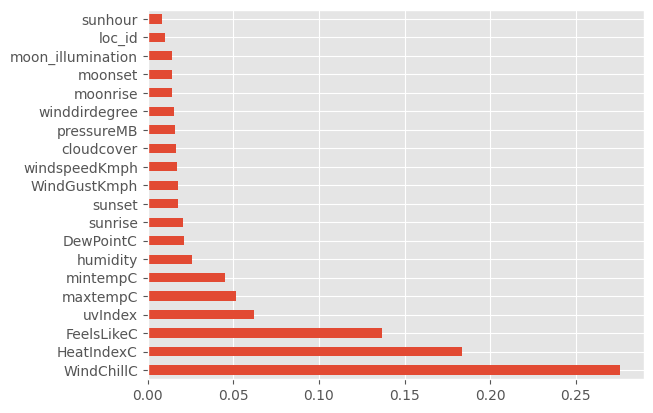

In [33]:
X = df.drop(['avgtempC','date'],axis=1)
y = df['avgtempC']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

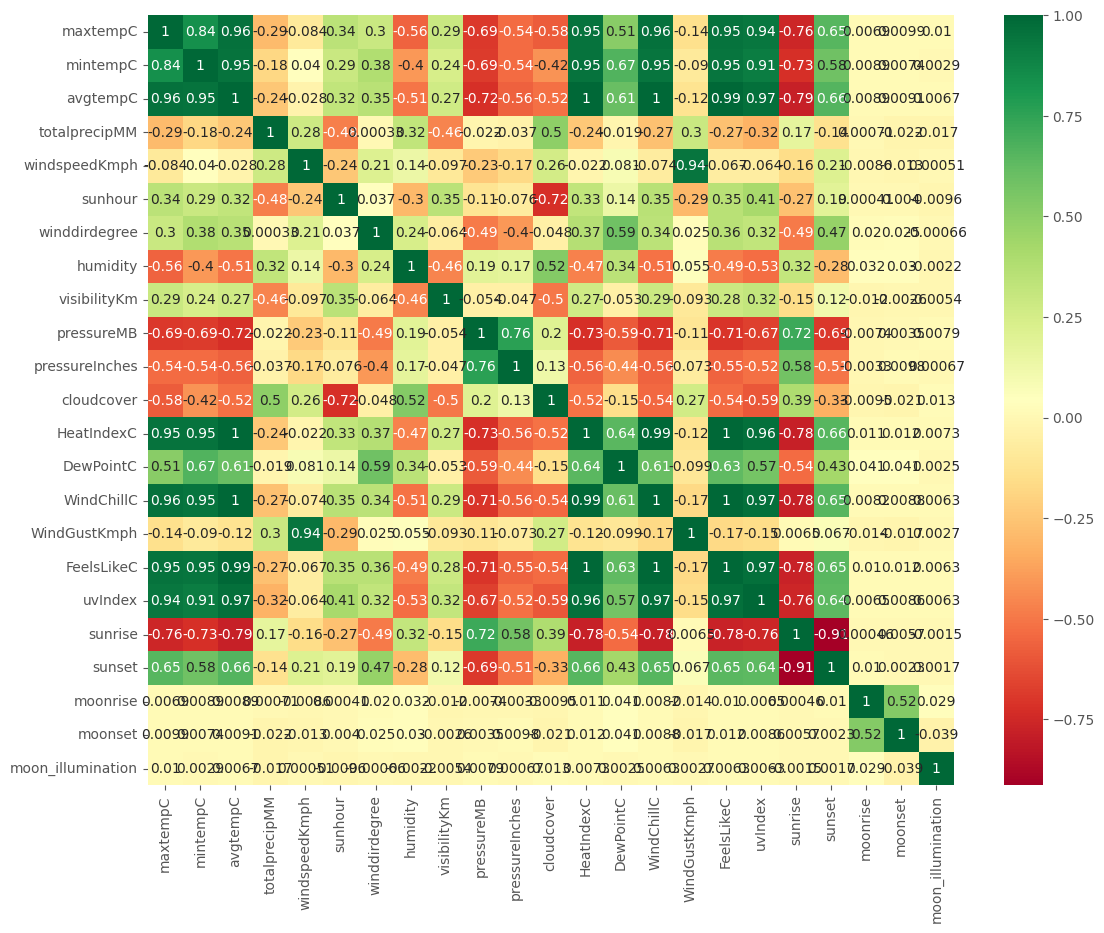

In [34]:
import numpy as np
import seaborn as sns
X = df.drop(['loc_id','date'],axis=1)
y = df['avgtempC']
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,10))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

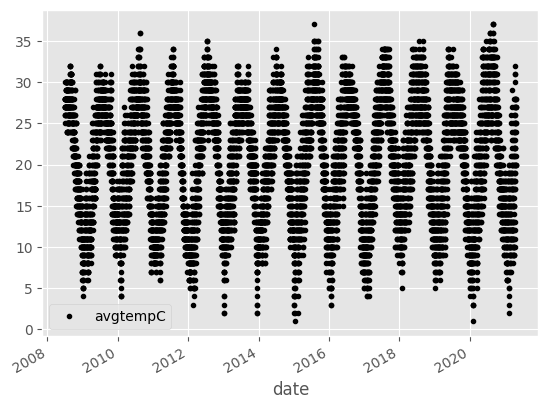

In [35]:

series = pd.read_csv("C:/Users/marve/Vidhyuth/Programming/Datasets/Jordan Weather/weather_data_24hr.csv")
series['date'] = pd.to_datetime(series['date'],format='%Y-%m-%d')
series= series[['avgtempC','date']]
series.plot(x='date',y='avgtempC',style='k.')
plt.show()

In [36]:
df = df.drop(['sunrise','pressureMB','cloudcover','humidity',
               'totalprecipMM','WindGustKmph','windspeedKmph',
               'moon_illumination','moonrise','moonset','visibilityKm',
               'sunhour','winddirdegree','pressureInches'],axis=1)

In [37]:
amman_df= df.loc[df['loc_id'] == 1]
amman_df=amman_df.set_index('date')
amman_df = amman_df.drop(['loc_id'],axis=1)
irbid_df= df.loc[df['loc_id'] == 2]
irbid_df=irbid_df.set_index('date')
irbid_df = irbid_df.drop(['loc_id'],axis=1)
aqaba_df= df.loc[df['loc_id'] == 3]
aqaba_df=aqaba_df.set_index('date')
aqaba_df = aqaba_df.drop(['loc_id'],axis=1)

In [38]:
#set of selected features
features = ['avgtempC','WindChillC','HeatIndexC','FeelsLikeC','uvIndex',
            'sunset', 'DewPointC']

In [39]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [40]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(amman_df, feature, N)
            derive_nth_day_feature(irbid_df, feature, N)
            derive_nth_day_feature(aqaba_df, feature, N)


In [41]:
amman_df.head(10)

,maxtempC,mintempC,avgtempC,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,uvIndex,sunset,avgtempC_1,...,FeelsLikeC_3,uvIndex_1,uvIndex_2,uvIndex_3,sunset_1,sunset_2,sunset_3,DewPointC_1,DewPointC_2,DewPointC_3
date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,34,24,28,28,14,28,28,7,-2208960780000000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-02,34,23,28,28,14,28,28,7,-2208960780000000000,28.0,...,NaN,7.0,NaN,NaN,-2.208961e+18,NaN,NaN,14.0,NaN,NaN
2008-07-03,34,23,27,28,14,27,28,7,-2208960840000000000,28.0,...,NaN,7.0,7.0,NaN,-2.208961e+18,-2.208961e+18,NaN,14.0,14.0,NaN
2008-07-04,34,21,27,27,15,27,27,7,-2208960840000000000,27.0,...,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,14.0,14.0,14.0
2008-07-05,34,23,28,28,13,28,28,7,-2208960840000000000,27.0,...,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,15.0,14.0,14.0
2008-07-06,33,21,26,27,16,26,27,7,-2208960840000000000,28.0,...,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,13.0,15.0,14.0
2008-07-07,33,20,27,27,16,27,27,7,-2208960840000000000,26.0,...,27.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,16.0,13.0,15.0
2008-07-08,34,23,28,28,14,28,28,7,-2208960840000000000,27.0,...,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,16.0,16.0,13.0
2008-07-09,35,23,28,28,13,28,28,7,-2208960900000000000,28.0,...,27.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,14.0,16.0,16.0


In [42]:
amman_df = amman_df.dropna()
irbid_df = irbid_df.dropna()
aqaba_df = aqaba_df.dropna()

In [43]:
'''amman_df.to_csv("amman_waether_data_24h.csv")
irbid_df.to_csv("irbid_waether_data_24h.csv")
aqaba_df.to_csv("aqaba_waether_data_24h.csv")'''

'amman_df.to_csv("amman_waether_data_24h.csv")\nirbid_df.to_csv("irbid_waether_data_24h.csv")\naqaba_df.to_csv("aqaba_waether_data_24h.csv")'

In [44]:
amman_df.corr()[['avgtempC']].sort_values('avgtempC')

,avgtempC
DewPointC,0.586560
DewPointC_1,0.597265
DewPointC_2,0.620865
DewPointC_3,0.629608
sunset,0.653764
sunset_1,0.665166
sunset_2,0.676375
sunset_3,0.687311
uvIndex_3,0.844092
WindChillC_3,0.864706


In [45]:
amman_df=amman_df.drop(['mintempC','maxtempC'],axis=1)
irbid_df=irbid_df.drop(['mintempC','maxtempC'],axis=1)
aqaba_df=aqaba_df.drop(['mintempC','maxtempC'],axis=1)

In [46]:
amman_df.columns

Index(['avgtempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'FeelsLikeC',
       'uvIndex', 'sunset', 'avgtempC_1', 'avgtempC_2', 'avgtempC_3',
       'WindChillC_1', 'WindChillC_2', 'WindChillC_3', 'HeatIndexC_1',
       'HeatIndexC_2', 'HeatIndexC_3', 'FeelsLikeC_1', 'FeelsLikeC_2',
       'FeelsLikeC_3', 'uvIndex_1', 'uvIndex_2', 'uvIndex_3', 'sunset_1',
       'sunset_2', 'sunset_3', 'DewPointC_1', 'DewPointC_2', 'DewPointC_3'],
      dtype='object')

In [47]:
#Using SciKit-Learn's LinearRegression Module to Predict the Weather
from sklearn.model_selection import train_test_split
# Data Partition
X_amman = amman_df.drop('avgtempC', axis=1)
y_amman = amman_df['avgtempC']

X_train, X_test, y_train, y_test = train_test_split(X_amman, y_amman, test_size=0.3, random_state=23,shuffle= False)

In [53]:
def plot_model(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title(f'{model_name} Predicted vs Actual')
    plt.show()

RMSE Score for Test set: 0.25
R2 Score for Test set: 1.0


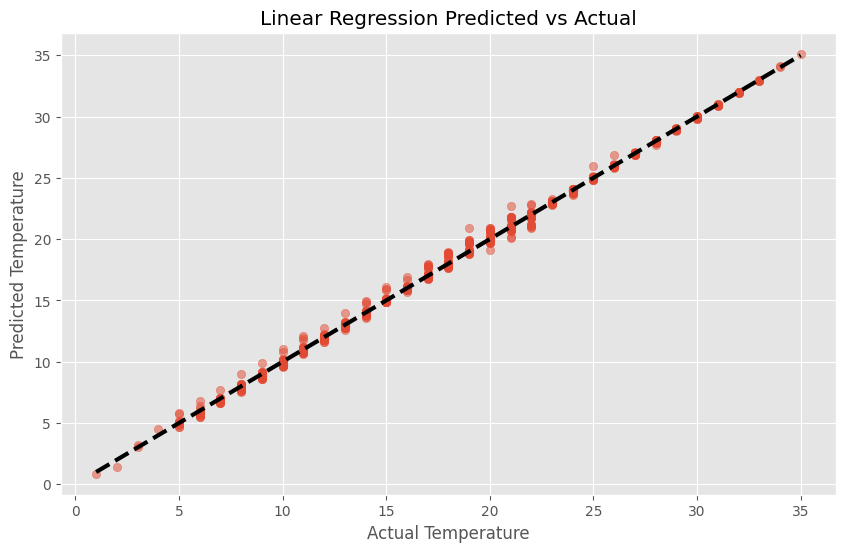

In [54]:
from sklearn.linear_model import LinearRegression
# instantiate the regressor class
linreg = LinearRegression()

# fit the build the model by fitting the regressor to the training data
linreg.fit(X_train, y_train)

# make a prediction set using the test set
prediction = linreg.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)
#acc = accuracy_score(y_test,prediction)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#print("Accuracy Score for Test set: "+"{:.2}".format(acc))
plot_model(y_test,prediction,"Linear Regression")

RMSE Score for Test set: 0.3
R2 Score for Test set: 1.0


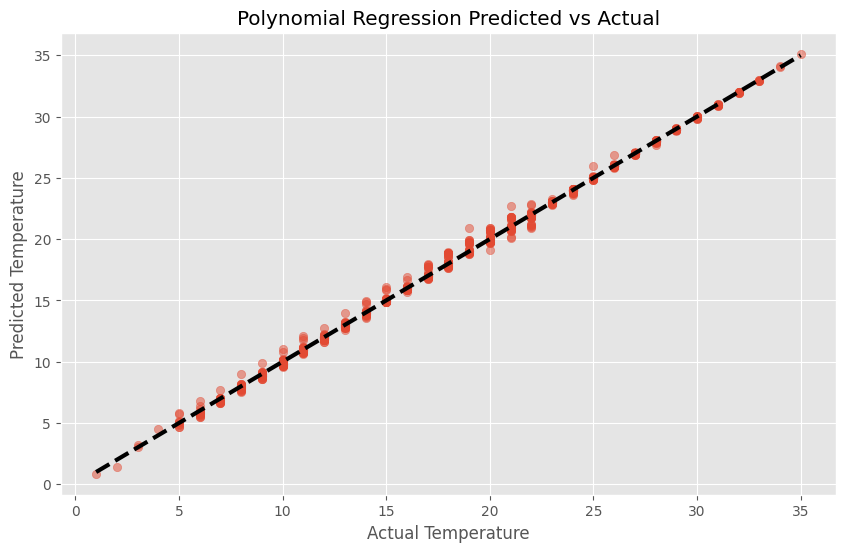

In [55]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
#acc = accuracy_score(y_test,prediction)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#print("Accuracy Score for Test set: "+"{:.2}".format(acc))
plot_model(y_test,prediction,"Polynomial Regression")

RMSE Score for Test set: 0.11
R2 Score for Test set: 1.0


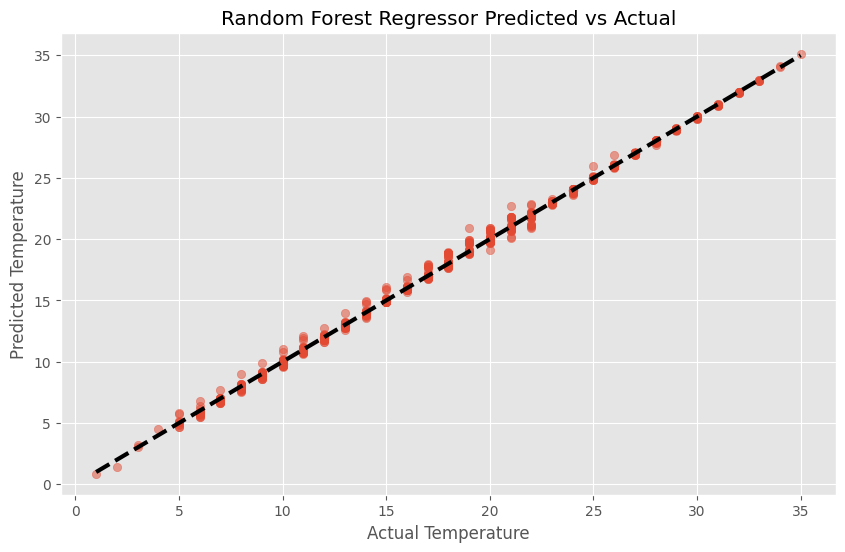

In [56]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
#acc = accuracy_score(y_test,prediction)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#print("Accuracy Score for Test set: "+"{:.2}".format(acc))
plot_model(y_test,prediction,"Random Forest Regressor")

RMSE Score for Test set: 0.29
R2 Score for Test set: 1.0


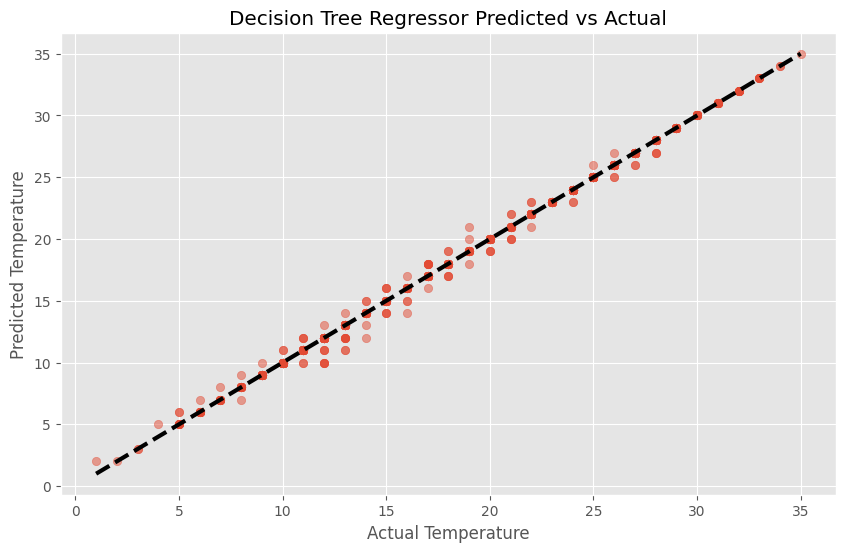

In [57]:
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor(random_state=0)
dtreg.fit(X_train,y_train)
prediction = dtreg.predict(X_test)
# evaluate the model

rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)
#acc = accuracy_score(y_test,prediction)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#print("Accuracy Score for Test set: "+"{:.2}".format(acc))
plot_model(y_test,prediction,"Decision Tree Regressor")

RMSE Score for Test set: 0.29
R2 Score for Test set: 1.0


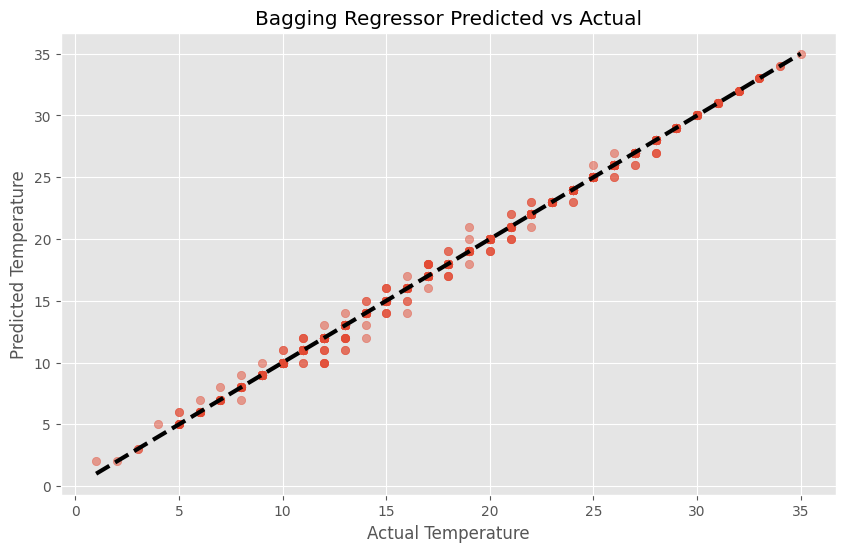

In [58]:
from sklearn.ensemble import BaggingRegressor
base_regressors = [
    DecisionTreeRegressor(),
    LinearRegression(),
    KNeighborsRegressor(),
    SVR()
]

bag_regressors = []

# Create and fit a BaggingRegressor for each base regressor
for base_regressor in base_regressors:
    bag_regressor = BaggingRegressor(base_regressor,
                                     n_estimators=10,
                                     random_state=42)
    bag_regressor.fit(X, y)
    bag_regressors.append(bag_regressor)

# Make predictions using each BaggingRegressor
predictions = []
for bag_regressor in bag_regressors:
    y_pred = bag_regressor.predict(X)
    predictions.append(y_pred)

rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)
#acc = accuracy_score(y_test,prediction)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#print("Accuracy Score for Test set: "+"{:.2}".format(acc))
plot_model(y_test,prediction,"Bagging Regressor")